In [1154]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1155]:
df = pd.read_csv("Telco-Customer-Churn.csv")

In [1156]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1157]:
df.shape

(7043, 21)

In [1158]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [1159]:
df.drop(columns=["customerID"],inplace=True)

In [1160]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


In [1161]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [1162]:
for column in df.columns:
  print(column,":",df[column].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [1163]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")

In [1164]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [1165]:
df["TotalCharges"].unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [1166]:
for column in df.columns:
  print(column,":",df[column].unique())

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2

In [1167]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [1168]:
num_columns = df.select_dtypes(include = ["int64","float64"]).columns.tolist()
num_columns

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [1169]:
num_columns.remove("SeniorCitizen")

In [1170]:
def histogram_plot(data,column):
  sns.histplot(data[column],kde=True)
  plt.title(f"Distribution of {column}")

  col_mean = data[column].mean()
  col_median = data[column].median()

  plt.axvline(col_mean,color="red",linestyle="--",label="Mean")
  plt.axvline(col_median,color="green",linestyle="-",label="Median")
  plt.legend()
  plt.show()


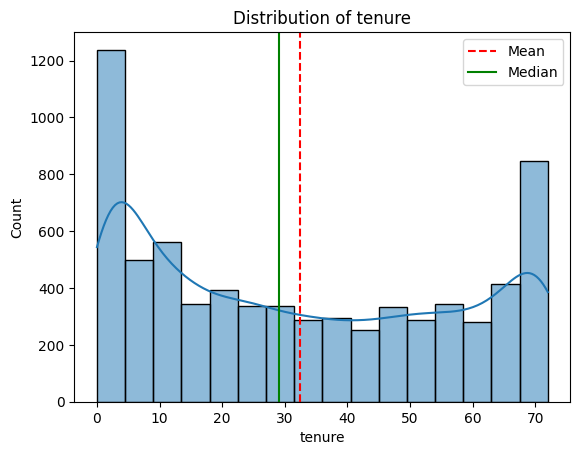

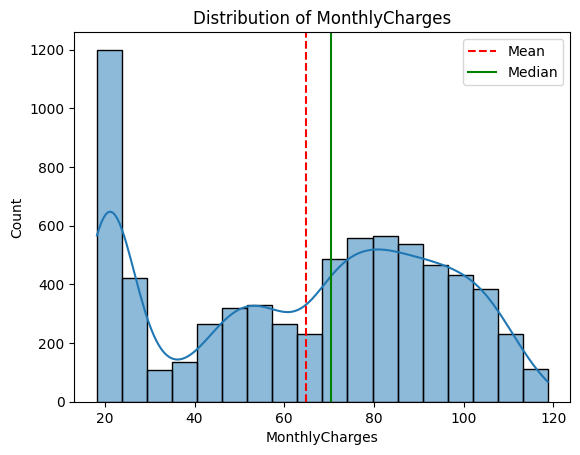

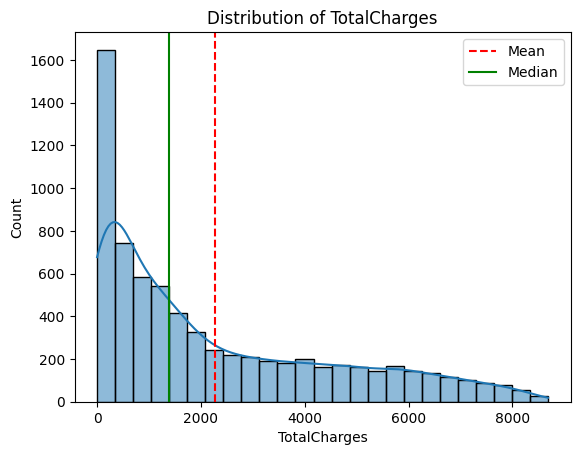

In [1171]:
for col in num_columns:
  histogram_plot(df,col)

In [1172]:
cor = df[num_columns].corr()

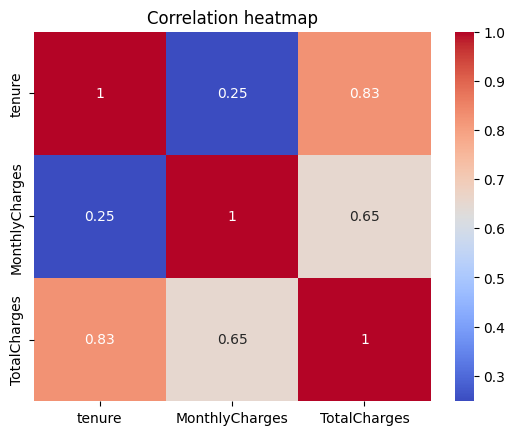

In [1173]:
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.title("Correlation heatmap")
plt.show()

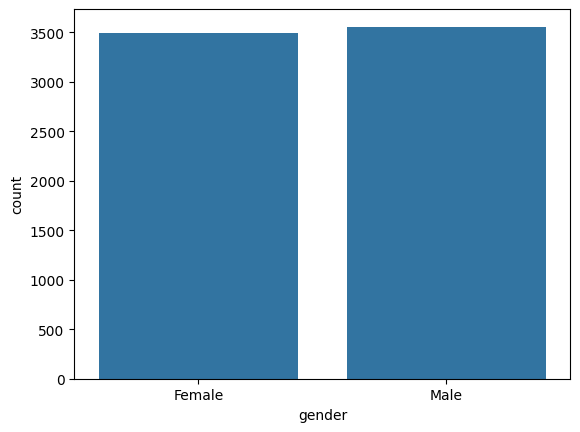

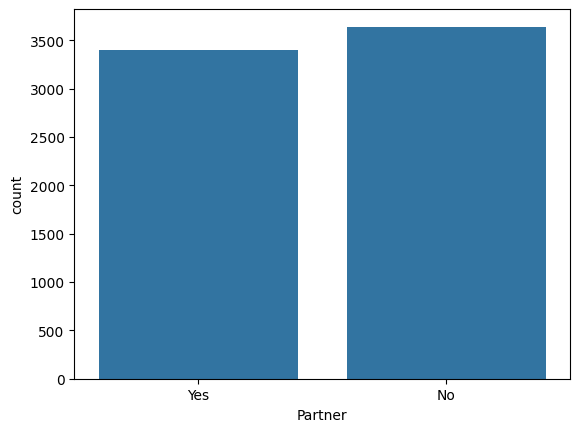

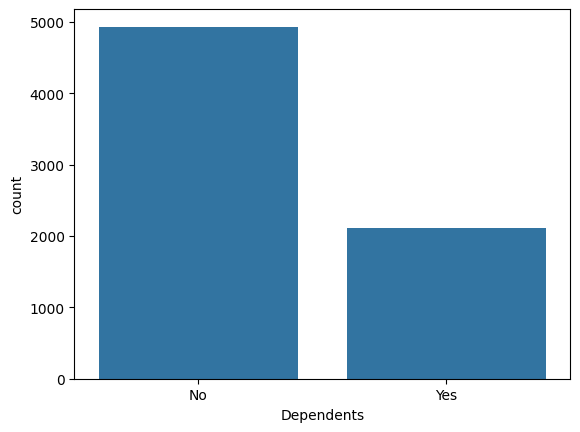

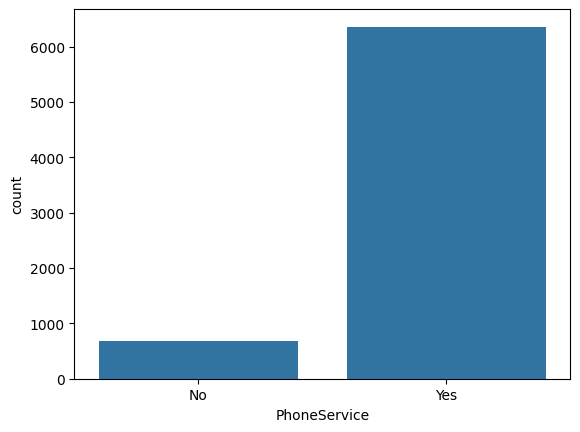

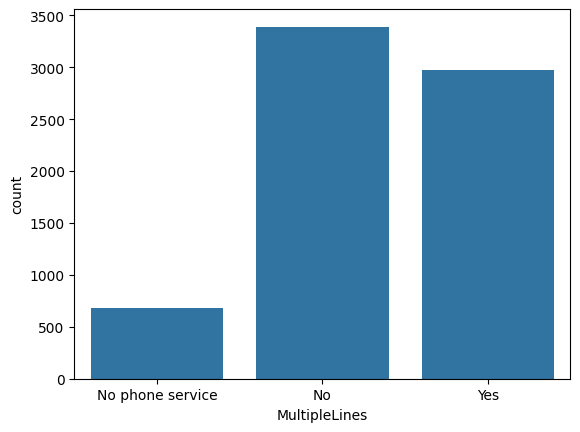

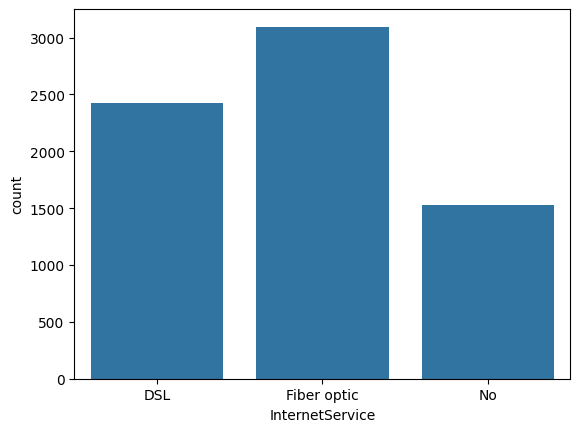

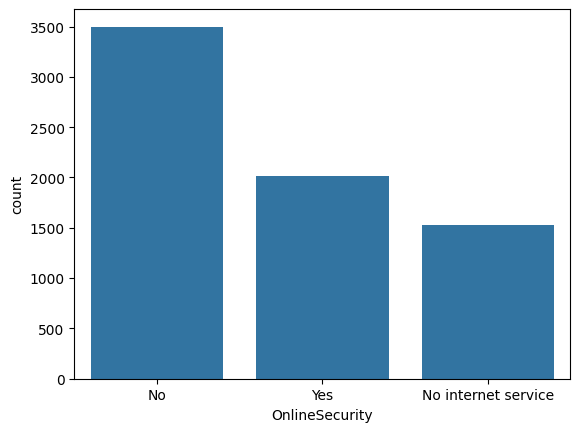

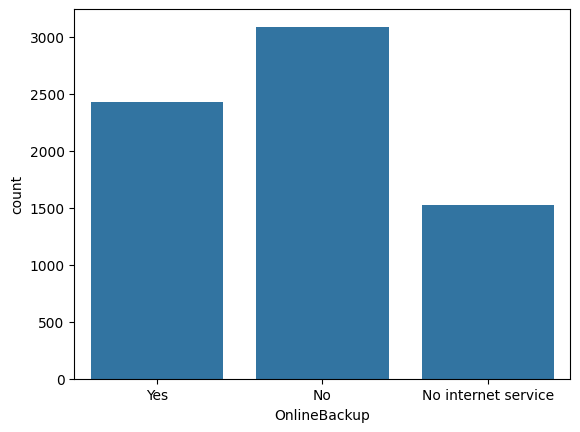

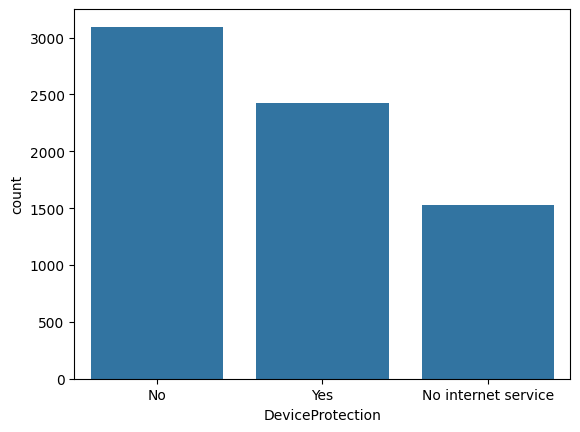

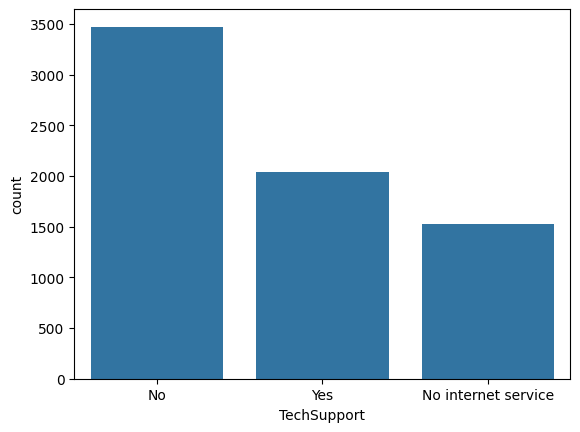

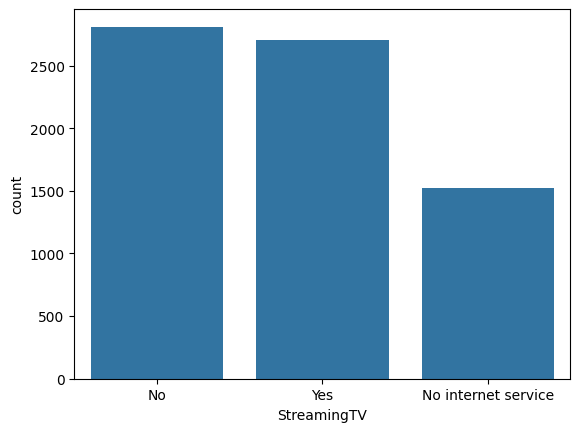

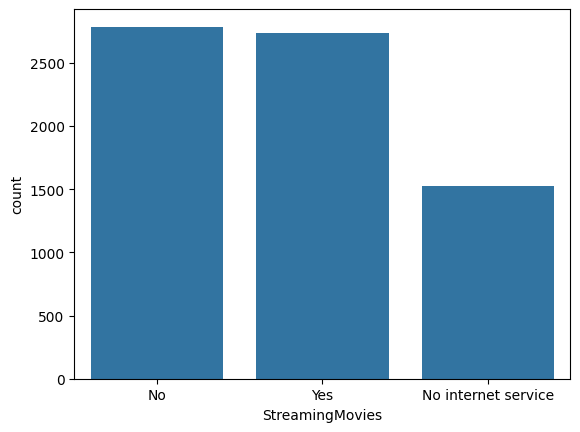

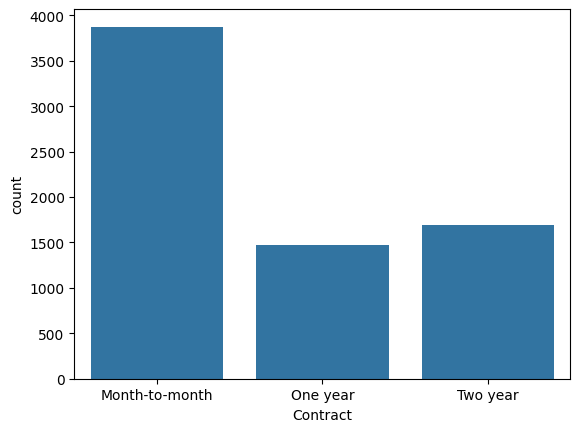

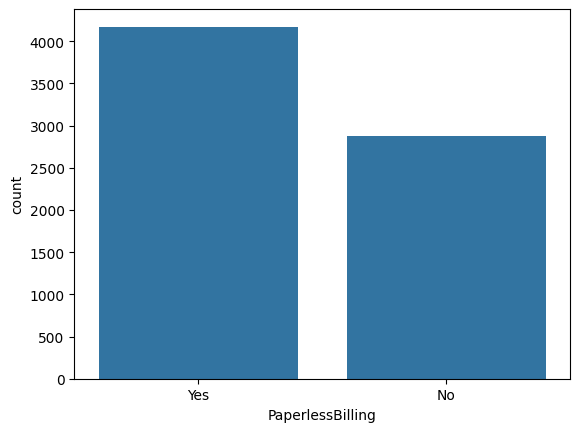

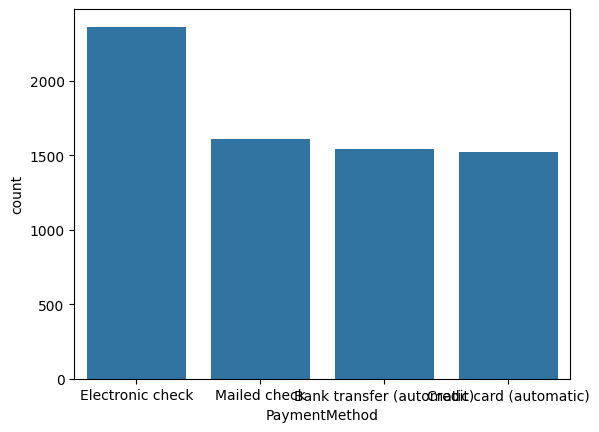

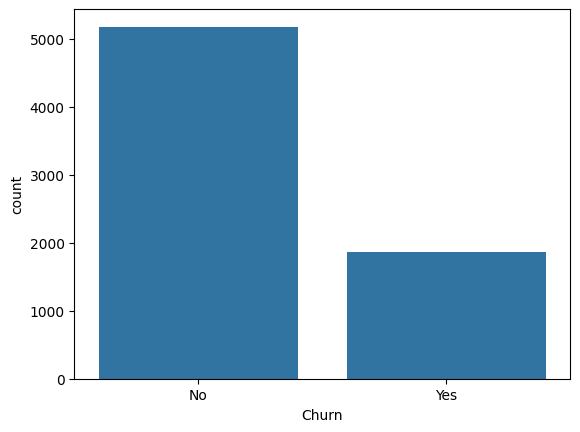

In [1174]:
for col in cat_columns:
  sns.countplot(df,x=col)
  plt.show()

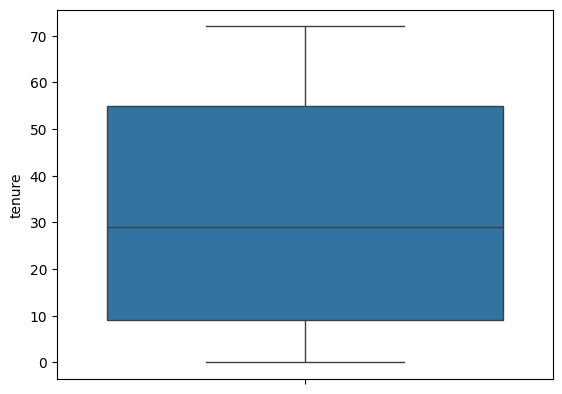

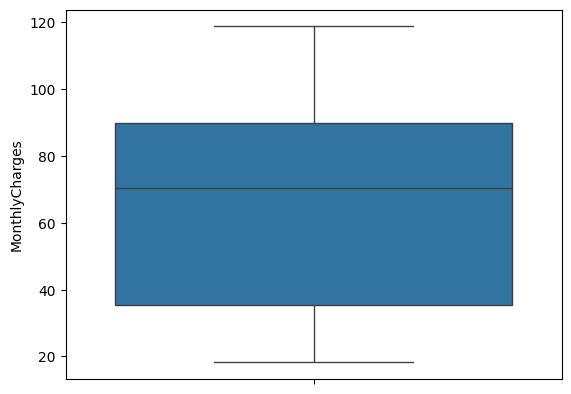

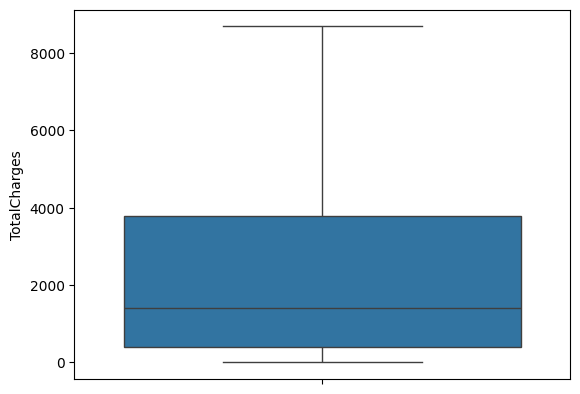

In [1175]:
for col in num_columns:
  sns.boxplot(df[col])
  plt.show()

In [1176]:
from sklearn.preprocessing import LabelEncoder

In [1177]:
cat_columns = df.select_dtypes(include="object").columns.tolist()
cat_columns

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [1178]:
encoders={}
for col in cat_columns:
  encoders[col] = LabelEncoder().fit(df[col])
joblib.dump(encoders,"encoders.pkl")
for col in cat_columns:
  df[col] = encoders[col].transform(df[col])

In [1179]:
encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder(),
 'Churn': LabelEncoder()}

In [1180]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [1181]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [1182]:
X = df.drop(columns=["Churn"])
y = df["Churn"]

In [1183]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [1184]:
X_train.shape,X_test.shape

((5634, 19), (1409, 19))

In [1185]:
from imblearn.over_sampling import SMOTE

In [1186]:
smote = SMOTE(random_state=42)

In [1187]:
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train)

In [1188]:
y_train_smote.value_counts()

,count
Churn,
0,4138
1,4138


In [1189]:
models = {"Decision Tree" : DecisionTreeClassifier(),
"Random Forest": RandomForestClassifier(),
"XGBoost" : XGBClassifier()}

In [1190]:
from sklearn.model_selection import cross_val_score,StratifiedKFold

In [1191]:
for model_name,model in models.items():
  skf = StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
  scores = cross_val_score(model,X_train_smote,y_train_smote,cv=5,scoring="accuracy")
  print(f"{model_name} : {np.mean(scores):.2f}")

Decision Tree : 0.78
Random Forest : 0.84
XGBoost : 0.83


In [1192]:
dtc = DecisionTreeClassifier()

In [1193]:
dtc.fit(X_train_smote,y_train_smote)






DecisionTreeClassifier()

In [1194]:
y_pred = dtc.predict(X_test)

In [1195]:
print(accuracy_score(y_test,y_pred),"\n")
print(confusion_matrix(y_test,y_pred),"\n")
print(classification_report(y_test,y_pred),"\n")

0.730305180979418 

[[824 212]
 [168 205]] 

              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1036
           1       0.49      0.55      0.52       373

    accuracy                           0.73      1409
   macro avg       0.66      0.67      0.67      1409
weighted avg       0.74      0.73      0.73      1409
 



In [1196]:
rfc = RandomForestClassifier()

In [1197]:
rfc.fit(X_train_smote,y_train_smote)

RandomForestClassifier()

In [1198]:
y_pred = rfc.predict(X_test)

In [1199]:
print(accuracy_score(y_test,y_pred),"\n")
print(confusion_matrix(y_test,y_pred),"\n")
print(classification_report(y_test,y_pred),"\n")

0.7842441447835344 

[[881 155]
 [149 224]] 

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1036
           1       0.59      0.60      0.60       373

    accuracy                           0.78      1409
   macro avg       0.72      0.73      0.72      1409
weighted avg       0.79      0.78      0.78      1409
 



In [1200]:
xgb = XGBClassifier()

In [1201]:
xgb.fit(X_train_smote,y_train_smote)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [1202]:
y_pred = xgb.predict(X_test)

In [1203]:
print(accuracy_score(y_test,y_pred),"\n")
print(confusion_matrix(y_test,y_pred),"\n")
print(classification_report(y_test,y_pred),"\n")

0.7806955287437899 

[[885 151]
 [158 215]] 

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.59      0.58      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409
 



In [1204]:
import joblib

In [1205]:
import joblib
joblib.dump(xgb,"xgb_model.pkl")

['xgb_model.pkl']

In [1206]:
def predict_churn(input_data_df):
  encoders = joblib.load("encoders.pkl")
  model = joblib.load("xgb_model.pkl")

  for column, encoder in encoders.items():
    if column in input_data_df.columns:
      try:
        input_data_df[column] = encoder.transform(input_data_df[column])
      except ValueError:
        print(f"Error encoding column '{column}' in input data.")

  prediction = model.predict(input_data_df)
  prediction_prob = model.predict_proba(input_data_df)
  if prediction == 0:
    print("The customer is not likely to churn.")
  else:
    print("The customer is likely to churn.")
  print(prediction_prob)

In [1207]:
input_data = {
    "gender":"Male",
    "SeniorCitizen":0,
    "Partner":"No",
    "Dependents":"No",
    "tenure":2,
    "PhoneService":"Yes",
    "MultipleLines":"No",
    "InternetService":"Fiber optic",
    "OnlineSecurity":"No",
    "OnlineBackup":"No",
    "DeviceProtection":"No",
    "TechSupport":"No",
    "StreamingTV":"No",
    "StreamingMovies":"No",
    "Contract":"Month-to-month",
    "PaperlessBilling":"Yes",
    "PaymentMethod":"Electronic check",
    "MonthlyCharges":70.7,
    "TotalCharges":151.65
}

In [1208]:
input_data_df = pd.DataFrame([input_data])
predict_churn(input_data_df)

The customer is likely to churn.
[[0.31806332 0.6819367 ]]
